**Polls Analysis - David Itzhakov**


### Section 1

First, after loading the table, I noticed typos in the 'עורך משאלים' column, which I fixed in the code below.

In [4]:
import ssl
import pandas as pd
import numpy as np
import seaborn as sns
ssl._create_default_https_context = ssl._create_unverified_context
polls = pd.read_html("https://themadad.com/allpolls/#.Y1UDJ3ZBxPb")[0]

for i in range(len(polls)):
  if(polls.iloc[i, 4] == 'דירקט פולס' or polls.iloc[i, 4] == 'דיקט פולס'):
    polls.iloc[i, 4] = 'דיירקט פולס'

polls

,מספרהסקר,תאריך,משיבים,כליתקשורת,עורךמשאלים,הליכוד,תקווה חדשה,הרוחהציונית,הציונותהדתית,יהדותהתורה,"ש""ס",ישראלביתנו,המחנההממלכתי,ישעתיד,מרצ,עבודה,עוצמה,המשותפת,"רע""מ"
0,1,06/04/2021,516,103FM,מנחם לזר,29,5.0,10.0,5,7,9,6,7,21,4,7,NaN,5,4
1,2,23/04/2021,500,103FM,יצחק כץ,30,4.0,9.0,6,8,8,5,7,20,5,7,NaN,6,5
2,3,24/04/2021,504,חדשות 12,מנו גבע,30,5.0,7.0,6,7,9,7,7,19,5,8,NaN,6,4
3,4,04/05/2021,699,חדשות 13,קמיל פוקס,28,6.0,11.0,5,7,7,5,8,21,5,7,NaN,6,4
4,5,23/05/2021,500,חדשות 12,מנו גבע,30,6.0,5.0,7,7,9,6,10,21,4,6,NaN,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,163,27/10/2022,1301,כאן חדשות,דודי חסיד,31,NaN,NaN,14,7,8,6,11,24,5,6,NaN,4,4
151,164,28/10/2022,500,מעריב,מנחם לזר,31,NaN,NaN,14,6,9,6,12,25,5,4,NaN,4,4
152,165,28/10/2022,801,חדשות 13,קמיל פוקס,30,NaN,NaN,15,7,8,5,10,27,4,6,NaN,4,4
153,166,28/10/2022,1007,חדשות 12,מנו גבע,31,NaN,NaN,14,7,8,6,11,25,5,5,NaN,4,4


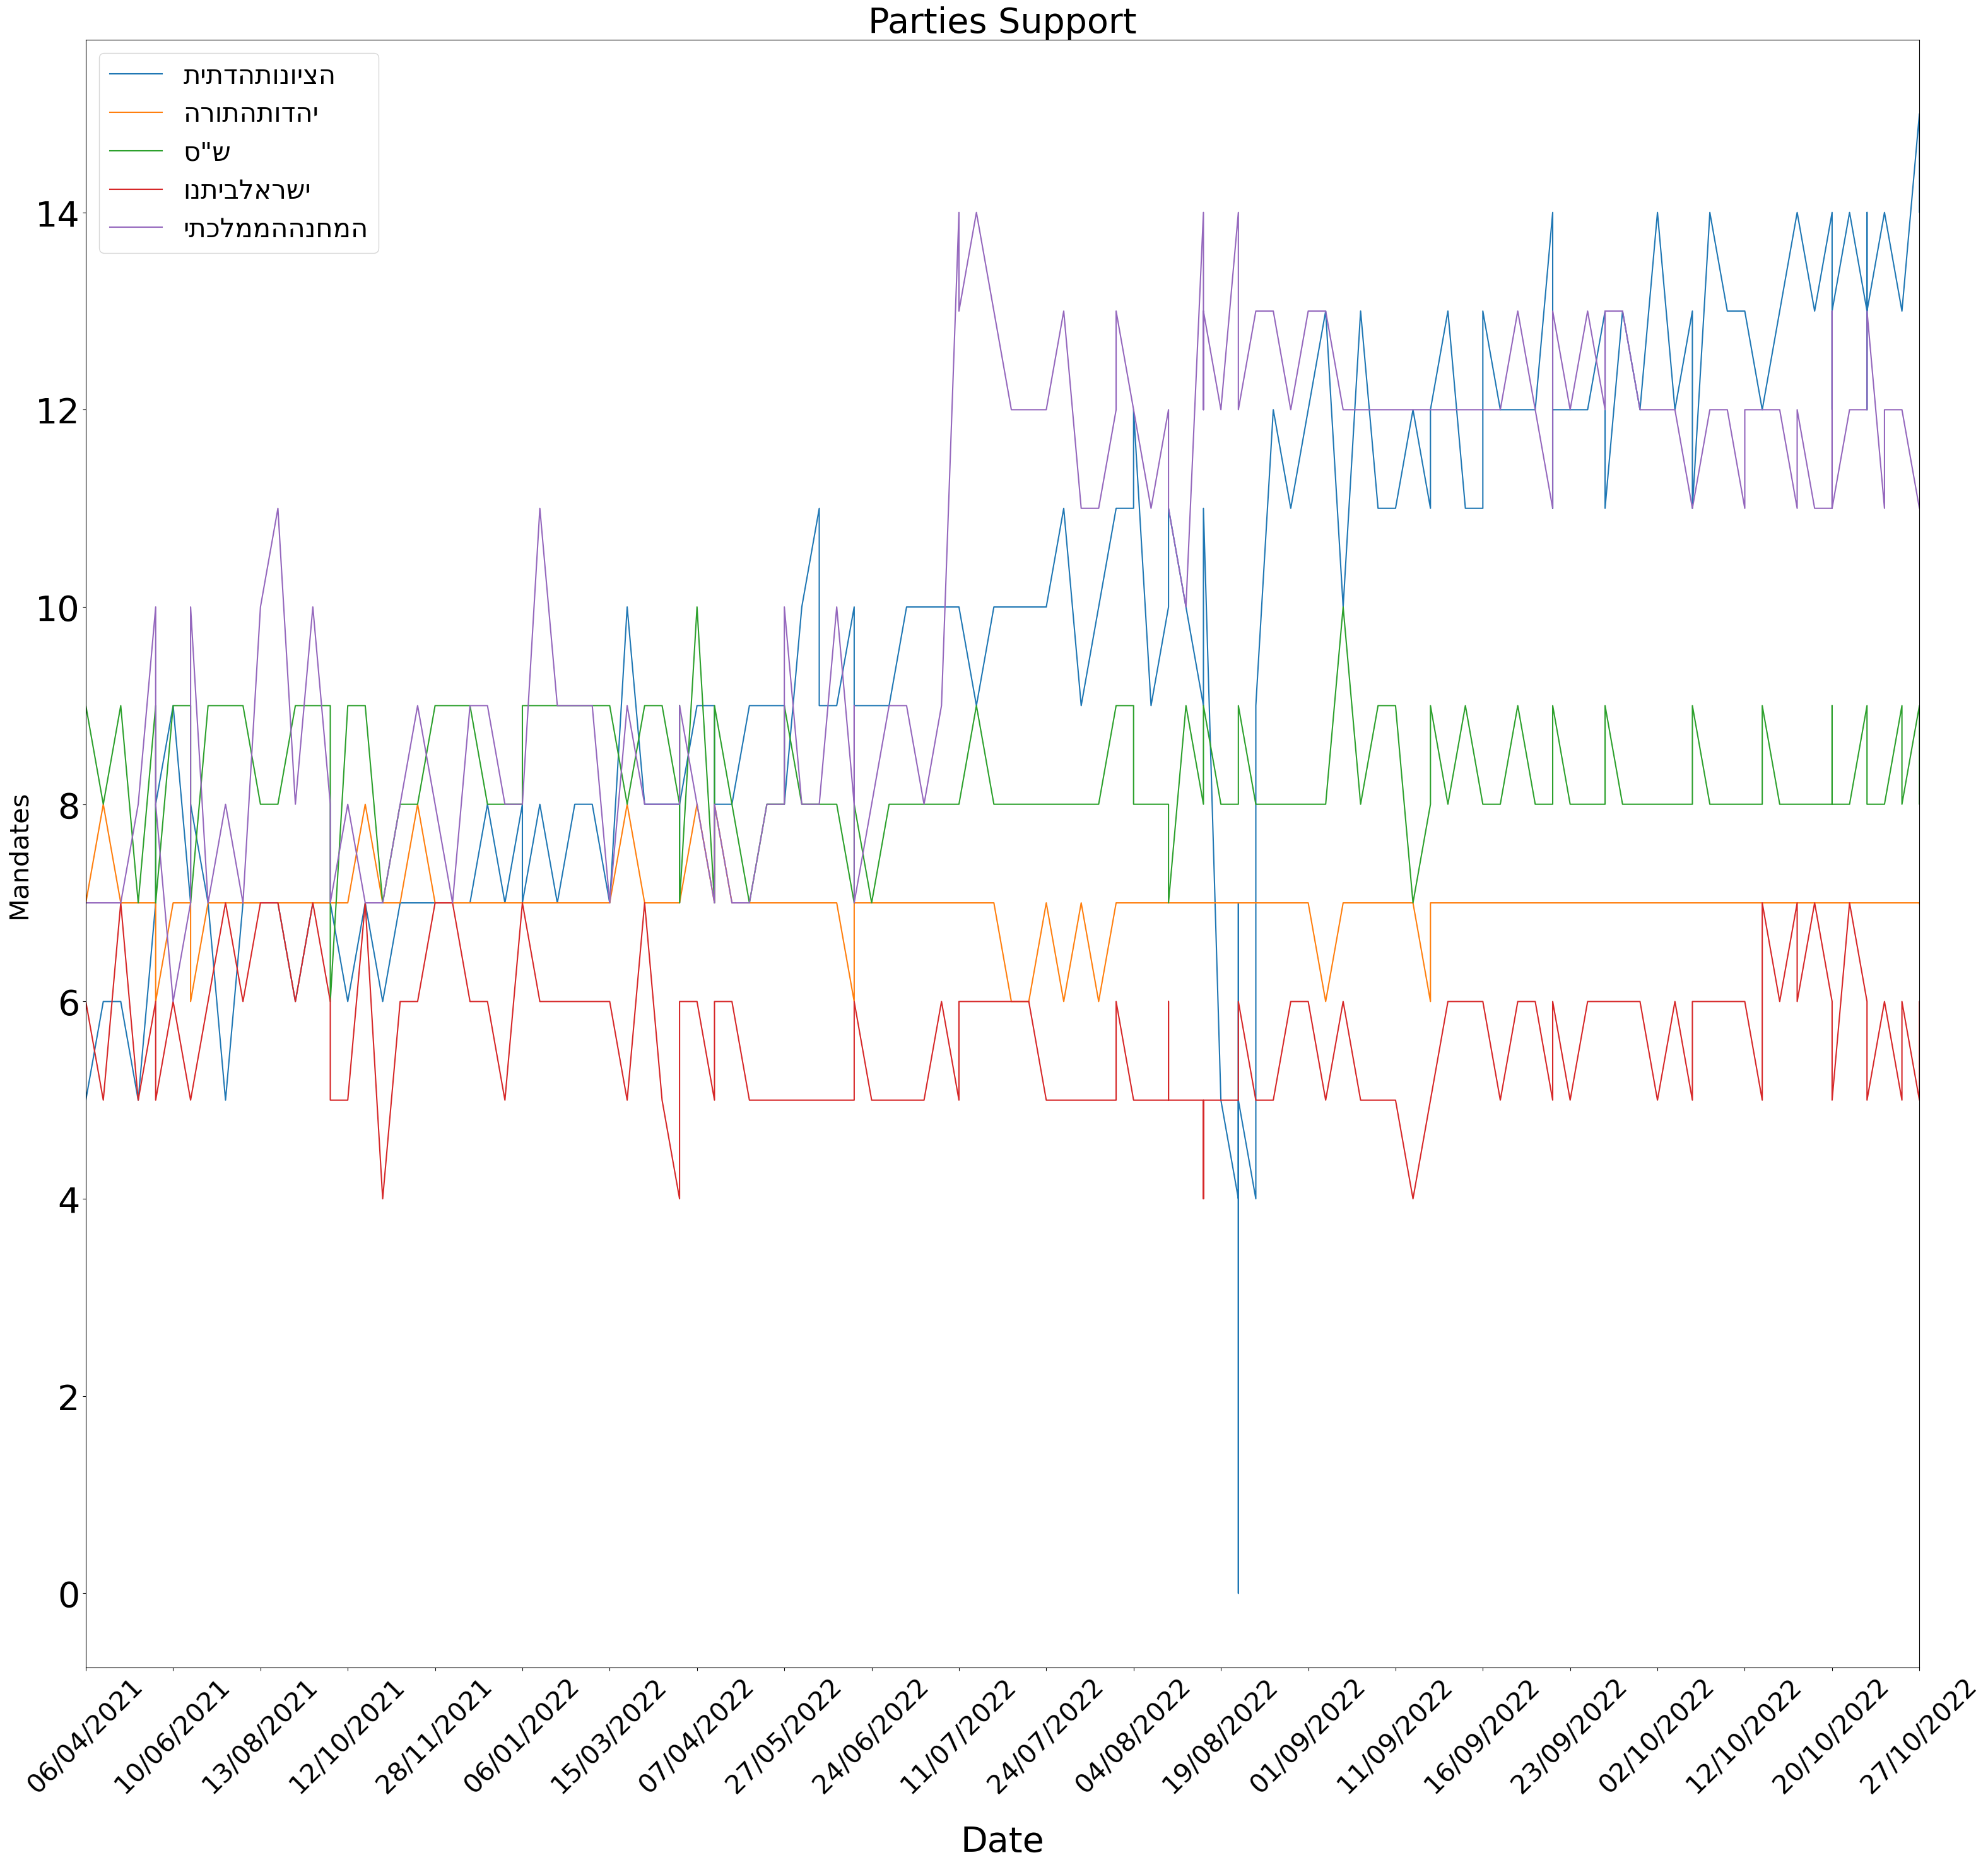

In [5]:
from datetime import datetime
from matplotlib import pyplot as plt
def parties_support(parties):
  parties.columns = [col[::-1] for col in parties.columns[0:]]
  plt.plot(polls["תאריך"], parties)
  plt.xticks(rotation=45)
  plt.legend(parties.columns,loc= 'upper left', fontsize = 30)
  plt.title("Parties Support", fontsize=40)
  plt.xlabel("Date",labelpad =30, fontsize=40)
  plt.ylabel("Mandates", fontsize=30)
  pd.to_datetime(polls["תאריך"], format = "%d/%m/%Y")
  lis = range(0, 155, 5)
  plt.xticks(lis, fontsize=30)
  plt.yticks(fontsize=40)
  plt.xlim(0, 105)
  plt.rcParams["figure.figsize"] = [37.50, 33.50]

parties = polls.iloc[0: , 8:13]
parties_support(parties)


In this graph we can see a big decrease in the 'הציונות הדתית' party around August 24th, 2022. We can attribute this to the temporary separation of the 2 party leaders.

Another major trend we see in the graph is that 'המחנה הממלכתי' party had a spike growth in Mandates around July-August of 2022, which could be attributed to Benny Gantz and Gideon Saar joining forces around this time.

### Section 2

In this section, I first calculate Mandates for each Gush (Party group) by summing relevant parties data.

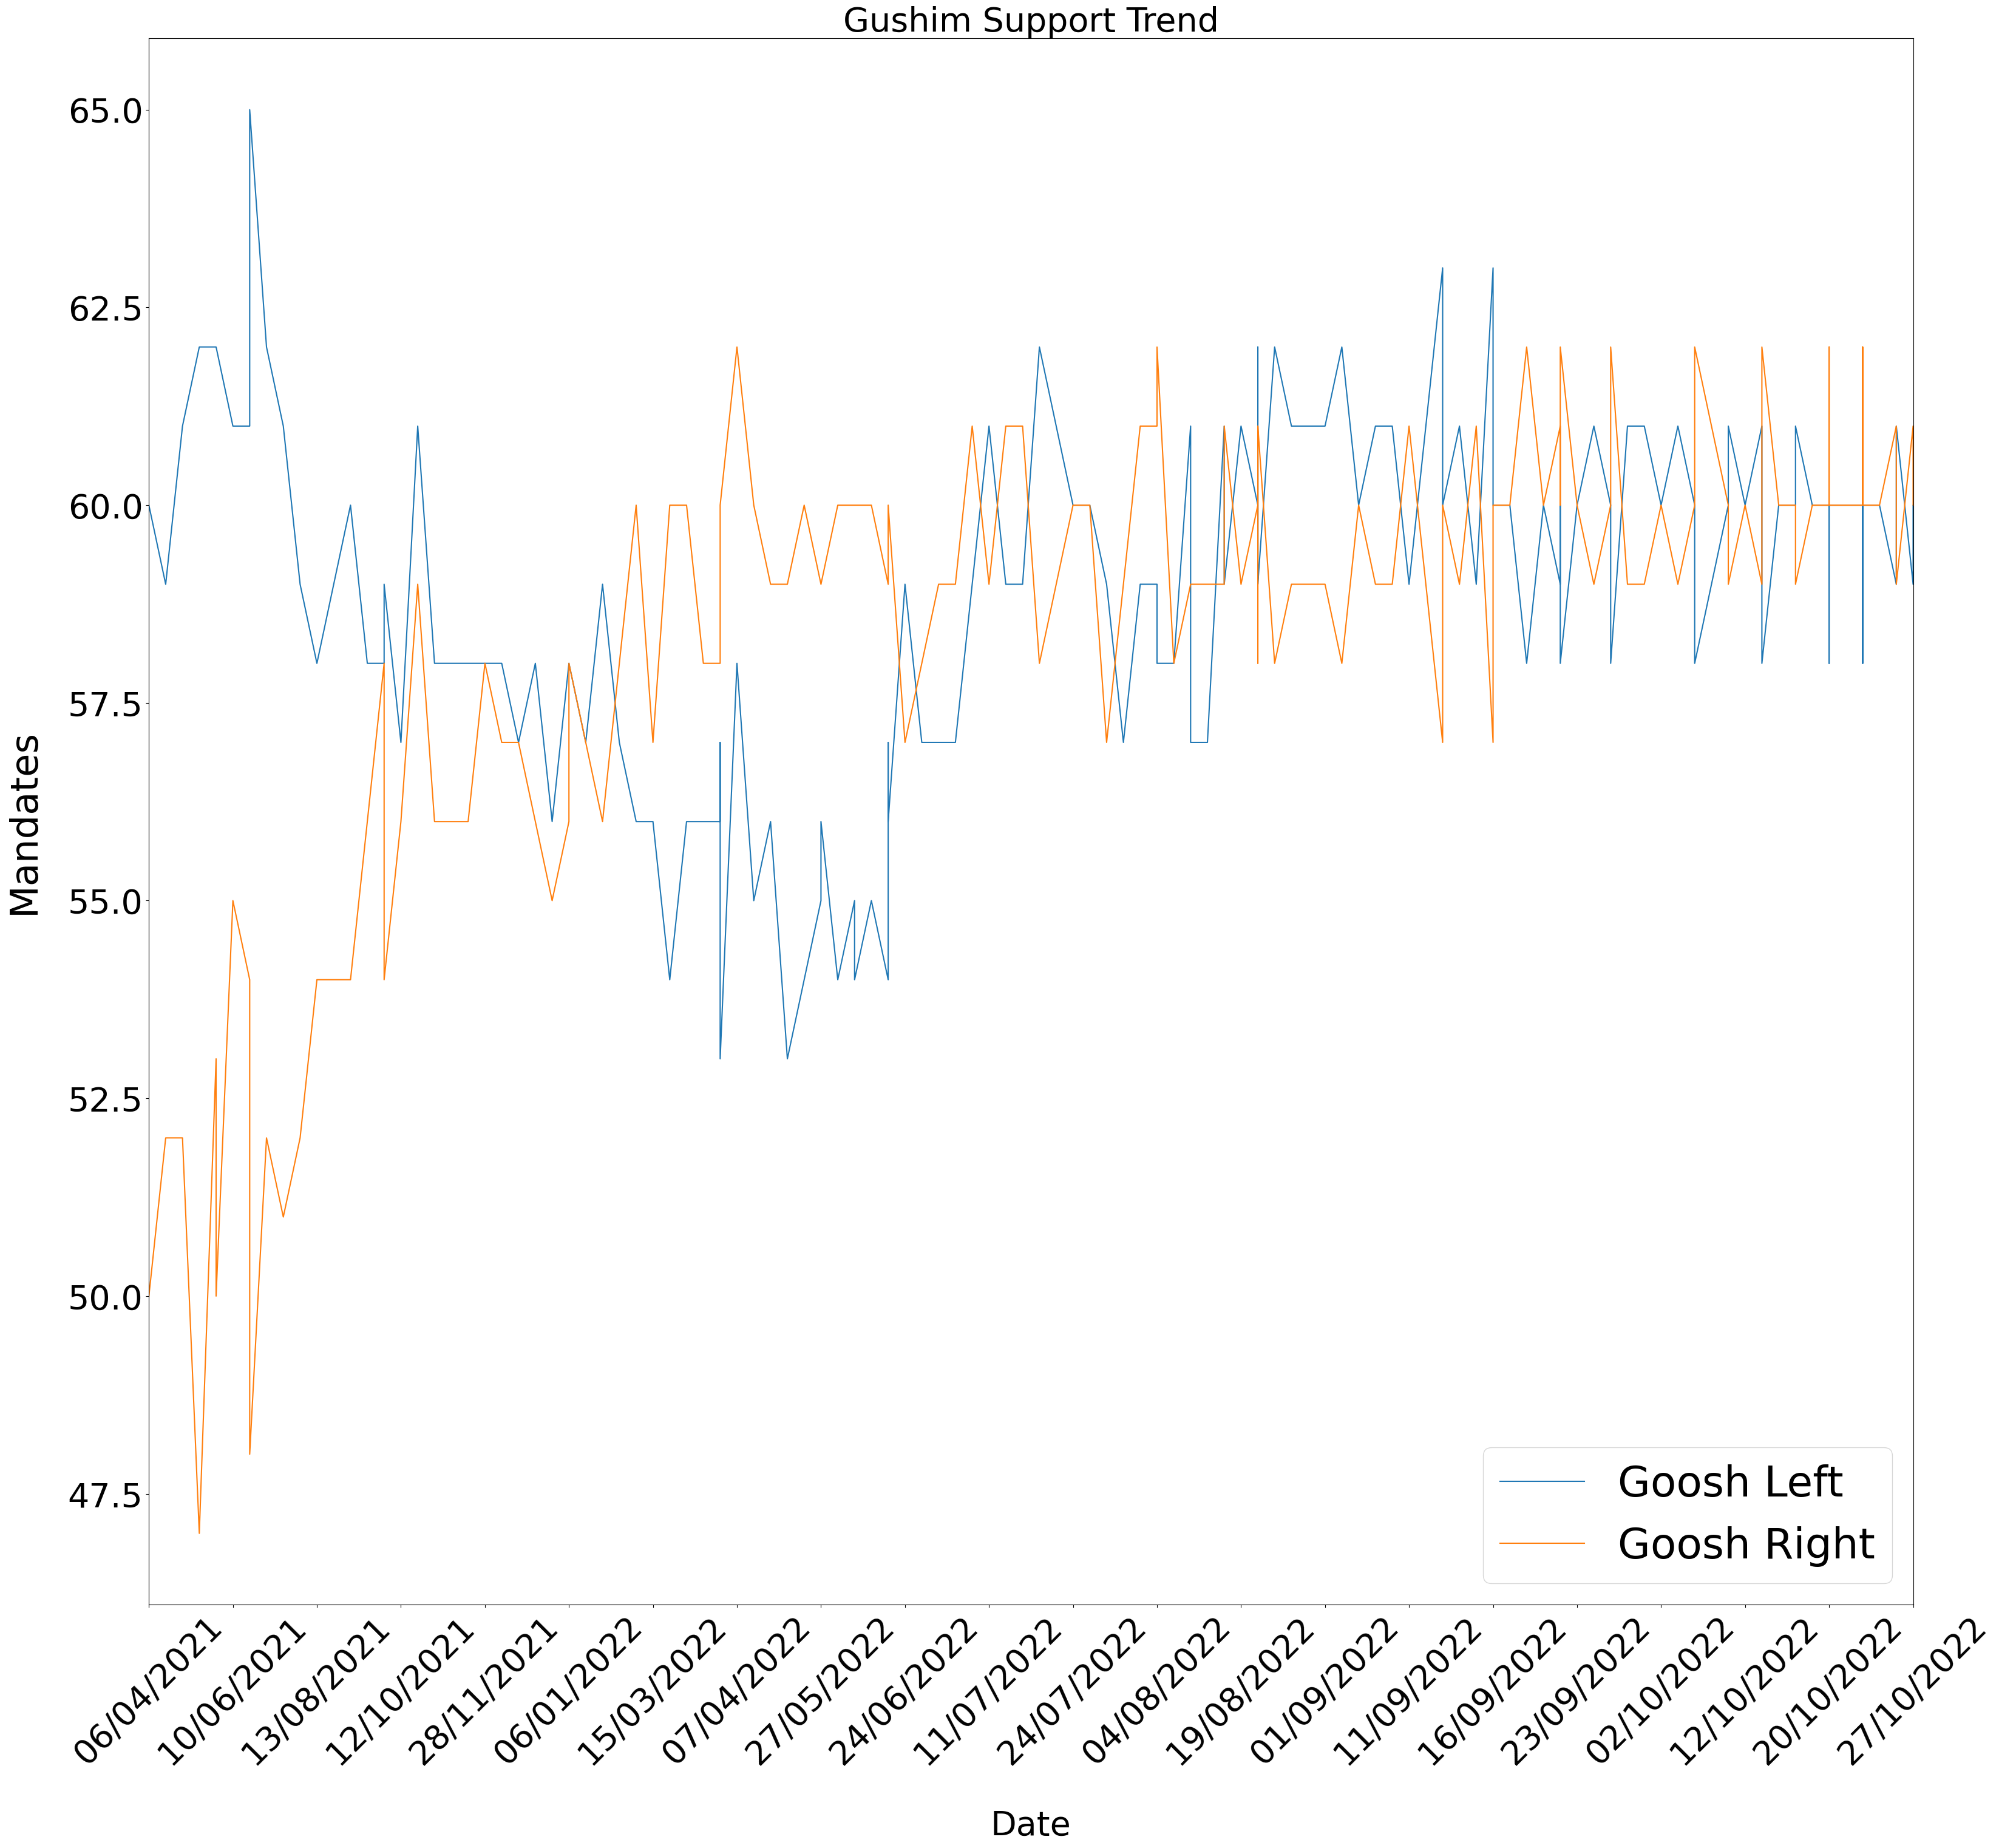

In [7]:
polls = polls.replace(np.nan, 0)
sum_right = [0]*155
sum_left = [0]*155

for i in range(len(sum_right)):
  sum_right[i] = polls.iloc[i,5]+polls.iloc[i,8]+polls.iloc[i,9]+polls.iloc[i,10]+polls.iloc[i,16]
  sum_left[i] = 120 - sum_right[i] - polls.iloc[i,7]

polls["Goosh Left"] = sum_left
polls["Goosh Right"] = sum_right

gushim = ["Goosh Left", "Goosh Right"]

plt.plot(polls["תאריך"], polls.iloc[0:, 19:21])
plt.xticks(rotation=45)
plt.legend(gushim,loc= 'lower right', fontsize = 50)
plt.title("Gushim Support Trend", fontsize=40)
plt.xlabel("Date",labelpad =45, fontsize=40)
plt.ylabel("Mandates",labelpad=30, fontsize=45)
pd.to_datetime(polls["תאריך"], format = "%d/%m/%Y")
lis = range(0, 155, 5)
plt.xticks(lis, fontsize=40)
plt.yticks(fontsize=40)
plt.xlim(0, 105)
plt.rcParams["figure.figsize"] = [37.50, 33.50]



From the graph above we clearly see a decline in Mandates for gush left steady with a rise for Gush right at the beginning of the polls, and then both Gushim are about steady at 60 Mandates.

### Section 3

I created an average of the polls for this part, against which I compared each poll individually and checked the distance from it to verify whether different poll conductors get different results  .

,מספרהסקר,תאריך,משיבים,כליתקשורת,עורךמשאלים,הליכוד,תקווה חדשה,הרוחהציונית,הציונותהדתית,יהדותהתורה,...,המחנההממלכתי,ישעתיד,מרצ,עבודה,עוצמה,המשותפת,"רע""מ",Goosh Left,Goosh Right,distance
0,1.0,06/04/2021,516.0,103FM,מנחם לזר,0.241667,0.041667,0.083333,0.041667,0.058333,...,0.058333,0.175000,0.033333,0.058333,0.000000,0.041667,0.033333,0.500000,0.416667,0.019097
1,2.0,23/04/2021,500.0,103FM,יצחק כץ,0.250000,0.033333,0.075000,0.050000,0.066667,...,0.058333,0.166667,0.041667,0.058333,0.000000,0.050000,0.041667,0.491667,0.433333,0.017014
2,3.0,24/04/2021,504.0,חדשות 12,מנו גבע,0.250000,0.041667,0.058333,0.050000,0.058333,...,0.058333,0.158333,0.041667,0.066667,0.000000,0.050000,0.033333,0.508333,0.433333,0.016875
3,4.0,04/05/2021,699.0,חדשות 13,קמיל פוקס,0.233333,0.050000,0.091667,0.041667,0.058333,...,0.066667,0.175000,0.041667,0.058333,0.000000,0.050000,0.033333,0.516667,0.391667,0.021667
4,5.0,23/05/2021,500.0,חדשות 12,מנו גבע,0.250000,0.050000,0.041667,0.058333,0.058333,...,0.083333,0.175000,0.033333,0.050000,0.000000,0.041667,0.033333,0.516667,0.441667,0.011667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,164.0,28/10/2022,500.0,מעריב,מנחם לזר,0.258333,0.000000,0.000000,0.116667,0.050000,...,0.100000,0.208333,0.041667,0.033333,0.000000,0.033333,0.033333,0.500000,0.500000,0.001250
152,165.0,28/10/2022,801.0,חדשות 13,קמיל פוקס,0.250000,0.000000,0.000000,0.125000,0.058333,...,0.083333,0.225000,0.033333,0.050000,0.000000,0.033333,0.033333,0.500000,0.500000,0.000000
153,166.0,28/10/2022,1007.0,חדשות 12,מנו גבע,0.258333,0.000000,0.000000,0.116667,0.058333,...,0.091667,0.208333,0.041667,0.041667,0.000000,0.033333,0.033333,0.500000,0.500000,0.000694
154,167.0,28/10/2022,500.0,גלי ישראל,רפי סמית,0.258333,0.000000,0.000000,0.116667,0.058333,...,0.091667,0.208333,0.033333,0.041667,0.000000,0.033333,0.033333,0.491667,0.508333,0.000764


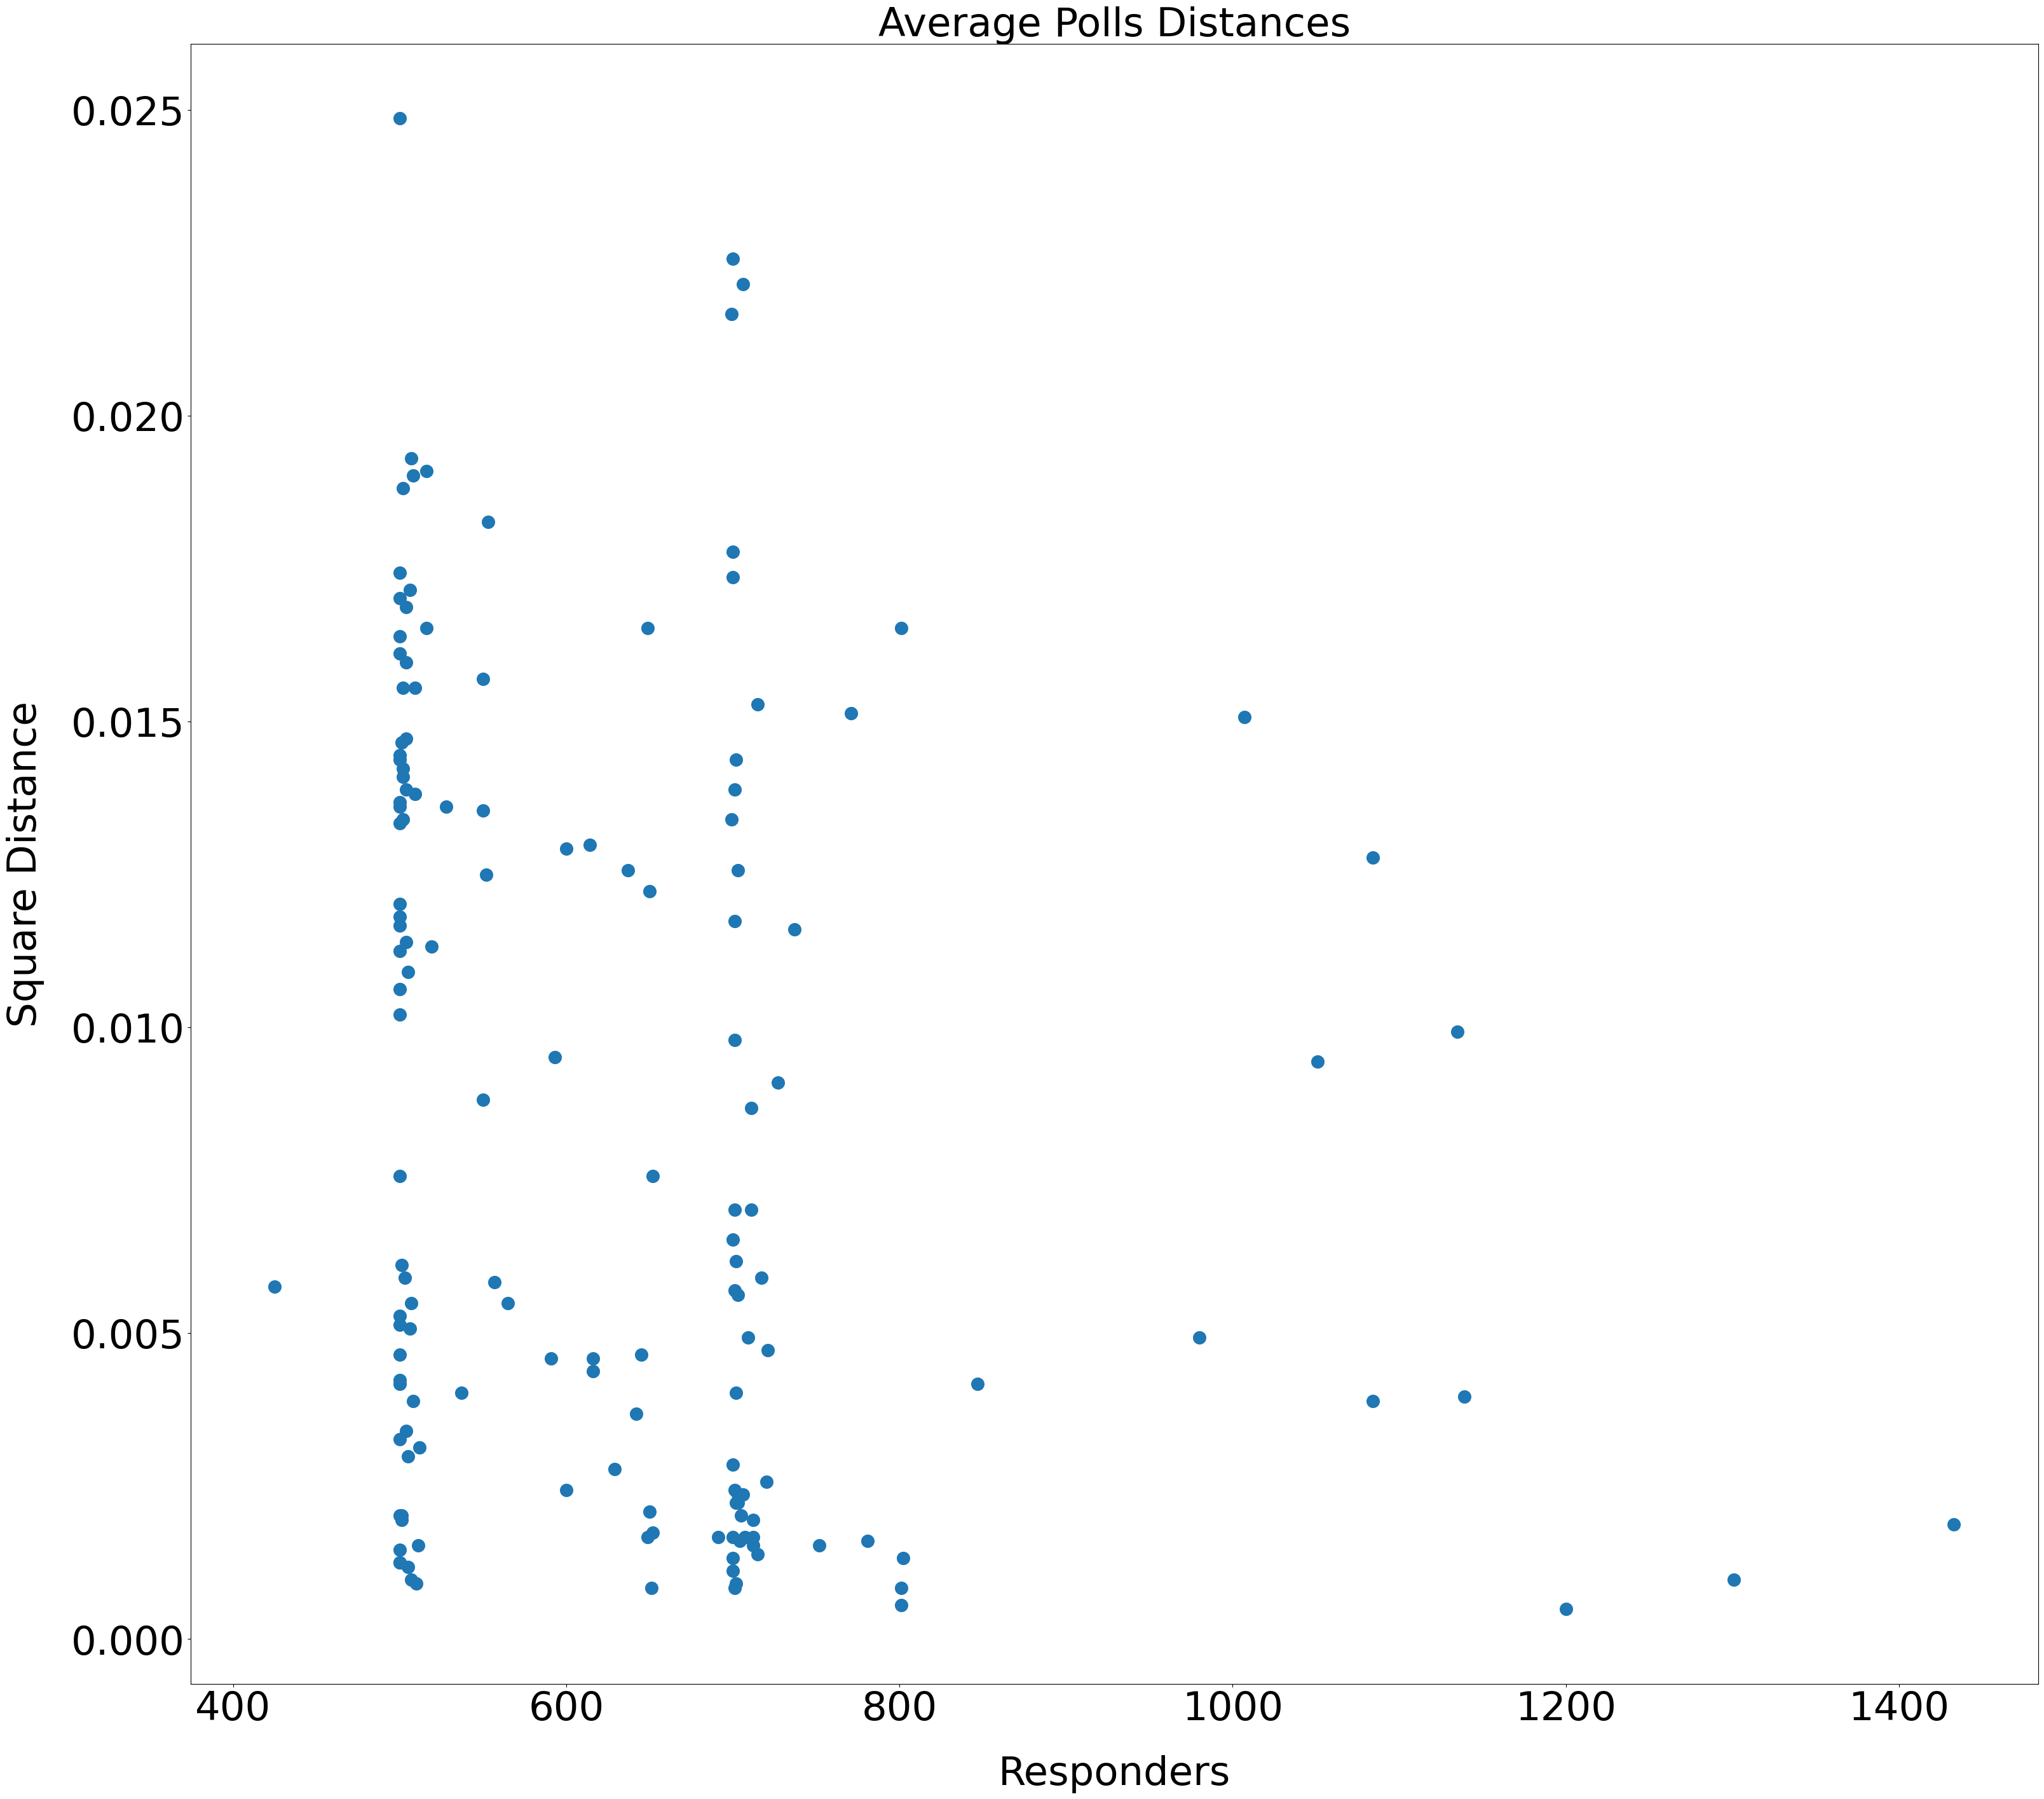

In [8]:
from numpy.core.fromnumeric import mean
normal_polls = polls
normal_polls = normal_polls.replace(np.nan, 0)
normal_polls.iloc[0:, 5:] = polls.iloc[0: ,5:]/120
normal_polls.loc['Average'] = pd.Series(normal_polls.iloc[0: , 5:].sum())/152

average_polls = normal_polls.iloc[152, 0:]
distance = [0] *len(normal_polls)
for i in range(len(normal_polls)):
  for j in range(5,20):
    distance[i] += (normal_polls.iloc[i , j] - normal_polls.iloc[152 , j]) ** 2
normal_polls['distance'] = distance


plt.scatter(normal_polls.iloc[0:152, 2], normal_polls.iloc[0:152, -1], s=200)
plt.title("Average Polls Distances", fontsize=45)
plt.xlabel("Responders",labelpad= 30, fontsize=45)
plt.ylabel("Square Distance",labelpad= 30, fontsize=45)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)


Looking at the graph above, we can say there isn't evidence to support the hypothesis that the amount of responders helps reduce the distance of each poll individually to the total polls average.

We can say that the results we got are expected, assuming the responders of each poll are chosen correctly (representing the population about the same way). Using a large amount of responders doesn't change the distance of the poll to the total average (also could be attributed to the fact that a large majority of polls have the same amount of responders, thus giving them a larger weight).

### Section 2

Text(0.5, 1.0, 'Sokrim distances Heatmap')

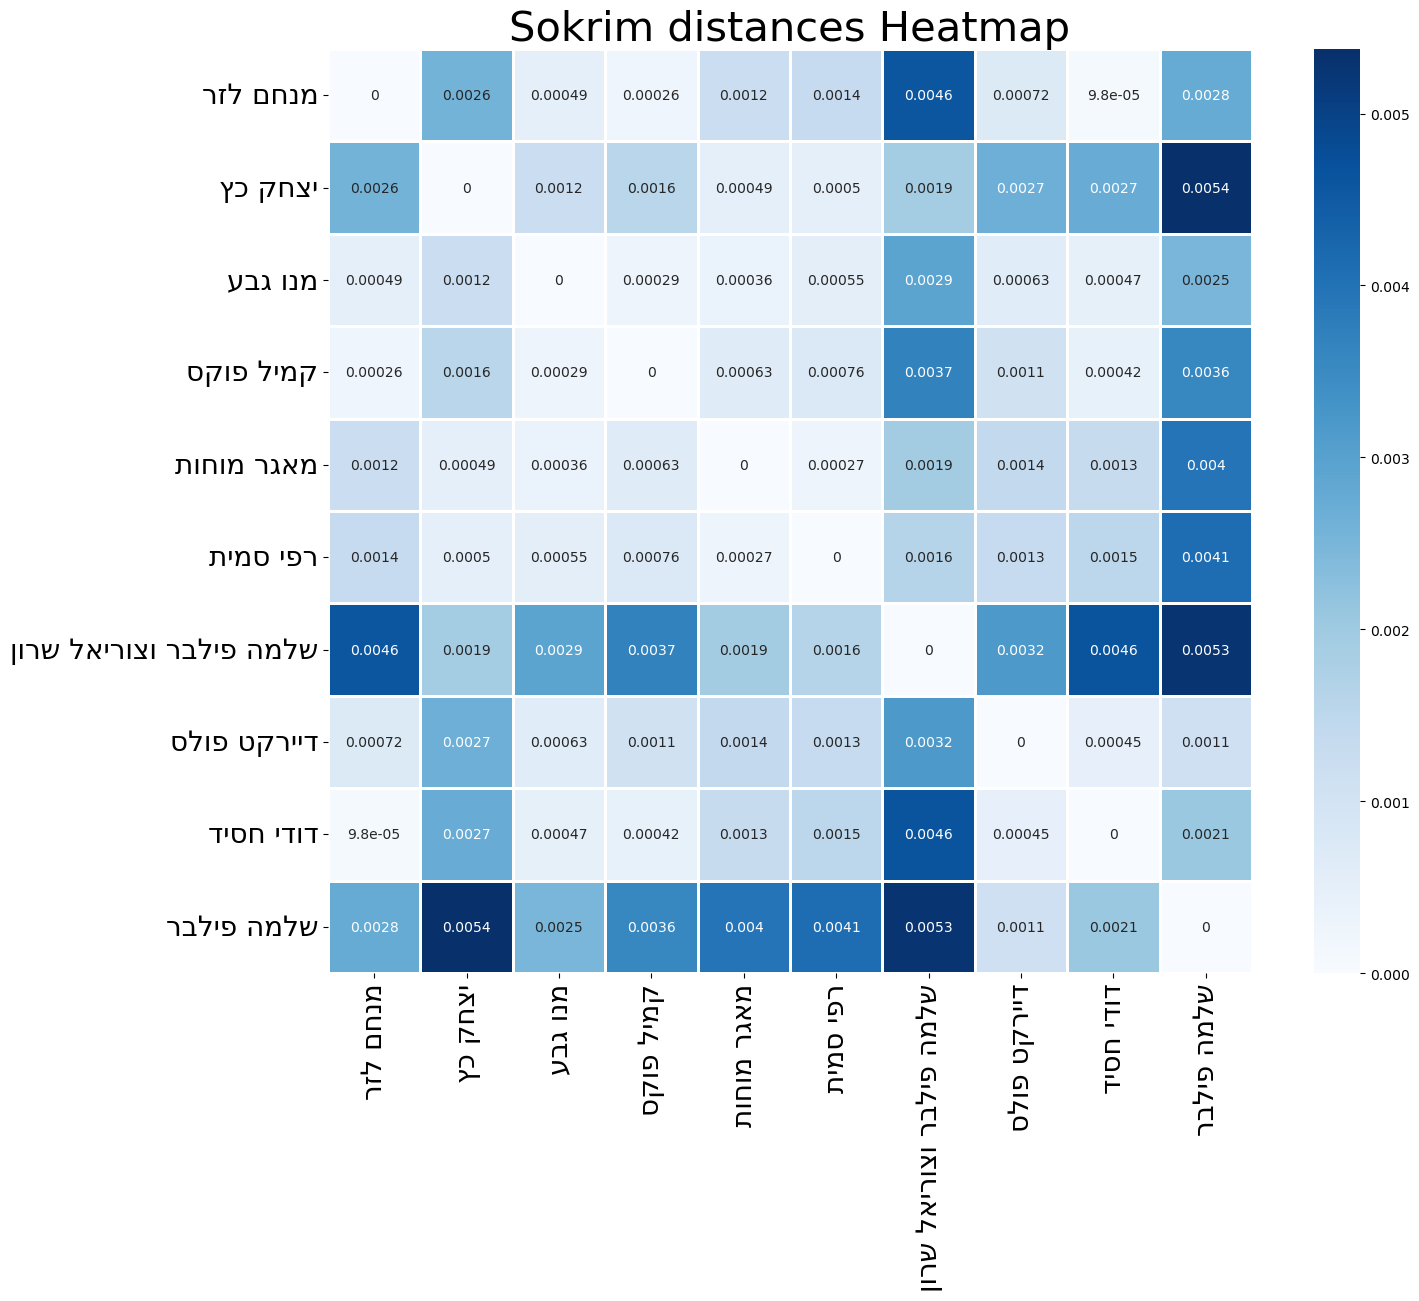

In [9]:

plt.figure(figsize=(16,12))

sokrim = [soker[::-1] for soker in normal_polls['עורךמשאלים'].unique()[0:-1]]


average_per_soker = []

for soker in sokrim:
  current_temp = normal_polls.loc[normal_polls['עורךמשאלים'] == soker[::-1]]
  temp_average = current_temp.iloc[0: , 5:19].mean()
  average_per_soker.append(temp_average)

sokrim_dataframe = pd.DataFrame(average_per_soker)
sokrim_dataframe.index = sokrim

distances = np.zeros((10,10))


for i in range(len(sokrim)):
    for j in range(len(sokrim)):
        for k in range(len(sokrim)):
            distances[k, j] = sum((sokrim_dataframe.iloc[j] - sokrim_dataframe.iloc[k]) ** 2)
        

sns.heatmap(distances, xticklabels = sokrim, yticklabels = sokrim ,square=True, cmap='Blues', linewidths=2,
            annot=True, annot_kws={'size': 10})
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20, rotation = 0)
plt.title('Sokrim distances Heatmap', fontsize = 30)






Looking at the heatmap we got, we can see most of the sokrim have an average distance of about 3% from each other. 
One soker that has a reletaviely large distance from others is שלמה פילבר, which has a quiet large distance from other sokrim. Looking at the data, we should note שלמה פילבר has only one poll conducted by him, which could expain the results better. 

### Section 3

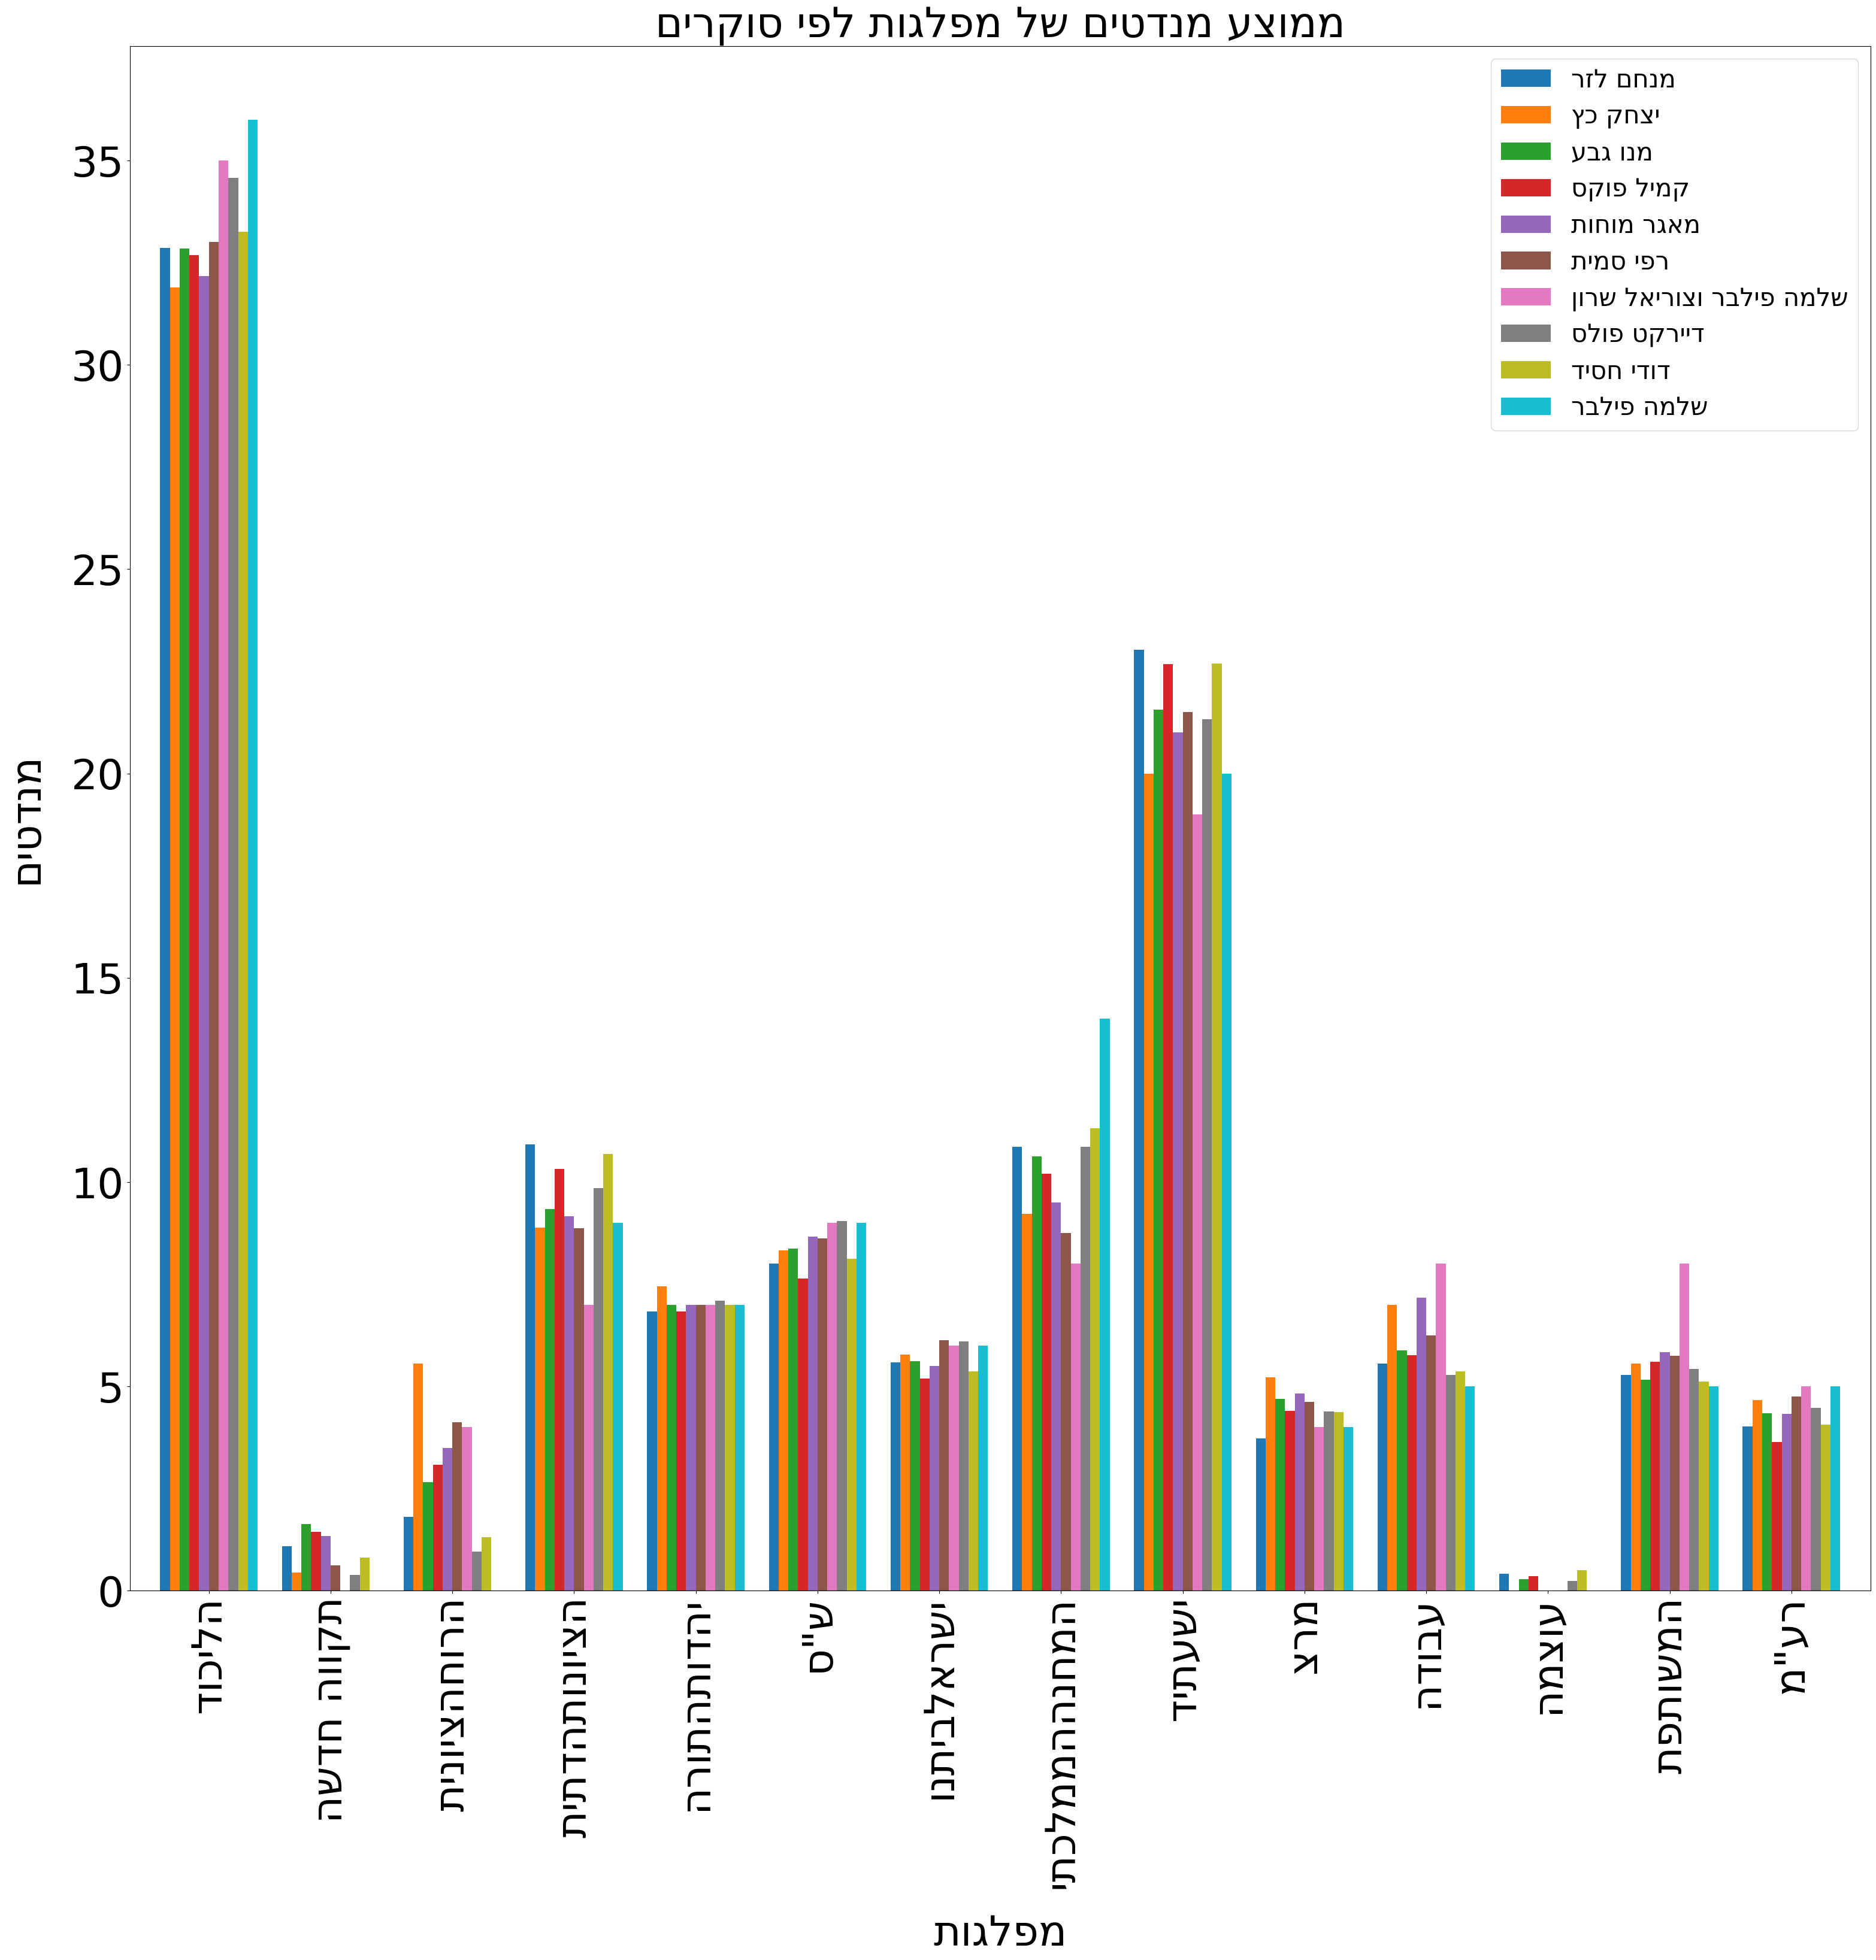

In [10]:

sokrim_dataframe.columns = [col[::-1] for col in sokrim_dataframe.columns[0:]]


sokrim_dataframe = sokrim_dataframe * 120



sokrim_dataframe.transpose().plot.bar(width = 0.8, linewidth = 1000) 
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.title('םירקוס יפל תוגלפמ לש םיטדנמ עצוממ', fontsize= 50)
plt.xlabel('תוגלפמ',labelpad = 30, fontsize= 50)
plt.ylabel('םיטדנמ',labelpad = 30, fontsize= 50)
plt.legend(loc = 'upper right', fontsize = 30)
plt.rcParams["figure.figsize"] = [37.50, 33.50]




Looking at the bar plot above, we can see that הליכוד, יש עתיד and הציונות הדתית are the parties with the biggest diffrecnes between different sokrim. Considering these parties are 3 of the 4 largest parties in the correcnt Knesset and in their Gushim, we can attribute some of the diffrecnes to changes between sokrim in the gushim. 